# <center>__MÉTODOS NUMÉRICOS__</center>
## <center>__PROJETO DA UNIDADE 2__</center>

#### <center>__ALUNO: Elismar Silva Pereira__</center>

<div class="alert alert-block alert-info">
1. INTRODUÇÃO
</div>

No ramo da ciencias de dados, a modelagem de tópico é um tipo de modelo estatístico para descobrir os "tópicos" abstratos que ocorrem em uma coleção de documentos. É uma técnica de aprendizado de máquina não supervisionada que é capaz de escanear um conjunto de textos, detectar padrões de palavras, orações e frases dentro deles e organizar automaticamente grupos de palavras e expressões semelhantes que melhor definem um grupo de documentos. 
Os conceitos da modelagem de tópico podem ser usado para infinitas aplicações, desde a coleta de dados na web até a criação de bots capazes de se comunicar com um humano. E não se restringe apenas nesta áreas, pois a modelagem de dados está presente no nosso dia a dia, sendo um dos exemplos mais clássicos as assistentes virtuais, os corretores de texto e detectores de spam.

<div class="alert alert-block alert-info">
2. DESCRIÇÃO DO PROBLEMA
</div>

Um dos principais problemas da modelagem de tópicos consiste na difuculdade para se trabalhar com ambiguidade, principalmente em certas línguas, como o portugês por exemplo, que possui diversas formas para expressar uma ação, consequência, solução, ideia, etc. 

A primeira aplicação deste trabalho consistirá na modelagem de tópicos de artigos de uma revista, onde iremos verficar os principais tópicos que podem ser montados com apenas uma pequena base de dados, tendo como alvo substantivos comuns que começam a aparecer com um certa frequência nos títulos dos arquivos, por exemplo hoje a inteligência artificial é um dos temas mais em alta no setor de pesquisa e desenvolvimento. Em uma segunda aplicação será realizada a modelagem de dados a partir de notícias do jornal ABC, de modo a criarmos novos tópicos e observar quais os assuntos mais em alta considerando palavras-chave frequentemente encontrada nos títulos das notícias.

<div class="alert alert-block alert-info">
3. MÉTODOS APLICADOS À SOLUÇÃO
</div>

* NMF (Non-Negative Matrix Factorization ou fatoração matricial não negativa)
  * A fatoração matricial não negativa utiliza técnicas de análise multivariada e álgebra linear. Ele decompõe os dados como uma matriz M no produto de duas matrizes de classificação inferior W e H. A submatriz W contém a base NMF; a submatriz H contém os coeficientes associados (pesos). O algoritmo modificará os valores de W e H tendo um produto proximo da matriz M. O algoritmo deve ter sempre um ponto de partida (um índice, por exemplo) para as iteralções. Basicamente o funcionamento pode ser visto na figura abaixo. 

  ![NMF](data/NMF.png)
 

<div class="alert alert-block alert-info">
4. IMPLEMENTAÇÃO
</div>

In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import NMF
from sklearn import decomposition
from sklearn.decomposition import LatentDirichletAllocation as LDA
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/danielmarquesvg/02fb54718bc9b0e178c21b9aeb1c290e/raw/848830aac4cbe8960f171b34da9b276d0ab0ddf1/papers.csv', sep=',')
df

,global_key,paper_key,conf_key,link,title,pages,citations
0,aaai,conf/aaai/0001JT16,conf/aaai/2016np,http://www.aaai.org/ocs/index.php/WS/AAAIW16/p...,Solving QBF Instances with Nested SAT Solvers.,NaN,NaN
1,aaai,conf/aaai/0001M13,conf/aaai/2013,http://www.aaai.org/ocs/index.php/AAAI/AAAI13/...,Multiscale Manifold Learning.,NaN,NaN
2,aaai,conf/aaai/0001STS15,conf/aaai/2015w3phi,http://aaai.org/ocs/index.php/WS/AAAIW15/paper...,Online Transfer Learning for Differential Diag...,NaN,NaN
3,aaai,conf/aaai/0001T15,conf/aaai/2015,http://www.aaai.org/ocs/index.php/AAAI/AAAI15/...,Logic Programming in Assumption-Based Argument...,1569-1575,NaN
4,aaai,conf/aaai/0001TZLL14,conf/aaai/2014,http://www.aaai.org/ocs/index.php/AAAI/AAAI14/...,Role-Aware Conformity Modeling and Analysis in...,958-965,NaN
...,...,...,...,...,...,...,...
119448,www,conf/www/ZuoHW10,conf/www/2010,http://doi.acm.org/10.1145/1772690.1772887,Patch-based skin color detection and its appli...,1227-1228,NaN
119449,www,conf/www/ZuoHWCL09,conf/www/2009,http://doi.acm.org/10.1145/1526709.1526921,Detecting image spam using local invariant fea...,1187-1188,NaN
119450,www,conf/www/ZuoWEZ16,conf/www/2016c,http://doi.acm.org/10.1145/2872518.2890522,Research Collaborations in Multidisciplinary I...,443-448,NaN
119451,www,conf/www/Zurko16,conf/www/2016,http://doi.acm.org/10.1145/2872427.2883583,La Sécurité Ouverte How We Doin? So Far?,5,NaN


Filtrando os dados, isto é, removendo as ocorrencias com NaN. Primeiramente todas as colunas que não serão utilizada no momento, deixando apenas a coluna "title".

In [4]:
df['all_title'] = df['title']
df = df[['all_title']] 

In [5]:
df

,all_title
0,Solving QBF Instances with Nested SAT Solvers.
1,Multiscale Manifold Learning.
2,Online Transfer Learning for Differential Diag...
3,Logic Programming in Assumption-Based Argument...
4,Role-Aware Conformity Modeling and Analysis in...
...,...
119448,Patch-based skin color detection and its appli...
119449,Detecting image spam using local invariant fea...
119450,Research Collaborations in Multidisciplinary I...
119451,La Sécurité Ouverte How We Doin? So Far?


In [6]:
df = df.dropna()
df.head(10)

,all_title
0,Solving QBF Instances with Nested SAT Solvers.
1,Multiscale Manifold Learning.
2,Online Transfer Learning for Differential Diag...
3,Logic Programming in Assumption-Based Argument...
4,Role-Aware Conformity Modeling and Analysis in...
5,Grounded Fixpoints.
6,Robust Subspace Clustering via Thresholding Ri...
7,Modeling and Mining Spatiotemporal Patterns of...
8,On the Scalable Learning of Stochastic Blockmo...
9,Bayesian Approach to Modeling and Detecting Co...


Em seguida irei diminuir o tamanho do dataframe, para amenizar os problemas de performance encontrados ao trabalhar com o dataset inteiro. Um valor relativamente não tão pesado que determinei foram 400 linhas.

In [7]:
DF_SIZE = 400

In [8]:
df = df.iloc[:DF_SIZE]
df

,all_title
0,Solving QBF Instances with Nested SAT Solvers.
1,Multiscale Manifold Learning.
2,Online Transfer Learning for Differential Diag...
3,Logic Programming in Assumption-Based Argument...
4,Role-Aware Conformity Modeling and Analysis in...
...,...
395,A Semantical Account of Progression in the Pre...
396,PREGO: An Action Language for Belief-Based Cog...
397,A First-Order Logic of Probability and Only Kn...
398,Increasing the Action Gap: New Operators for R...


E teremos um dataframe contendo todos os nomes de artigos publicados. O próximo passo será procurar e separar os substantivos de cada título, para isto irei utilizar a biblioteca *en_core_web_sm*, esta capaz de conseguir estrair cada substantivo em inglês.

In [9]:
import spacy
import en_core_web_sm
from spacy.lang.en import English

Carregando e configurando o módulo:

In [10]:
nlp = en_core_web_sm.load()

In [11]:
def nouns_mining(title):
  nouns_list = []
  for t in nlp.pipe(title):
    nouns = " ".join(token.lemma_ for token in t if token.pos_ == 'NOUN')
    nouns_list.append(nouns)
  return nouns_list

Procurando os substrantivos presentes em cada título:

In [12]:
titles = df['all_title'].values.copy().tolist()
nouns = nouns_mining(titles)

df["nouns_list"] = nouns

In [13]:
df

,all_title,nouns_list
0,Solving QBF Instances with Nested SAT Solvers.,instance solver
1,Multiscale Manifold Learning.,
2,Online Transfer Learning for Differential Diag...,transfer
3,Logic Programming in Assumption-Based Argument...,logic programming
4,Role-Aware Conformity Modeling and Analysis in...,role
...,...,...
395,A Semantical Account of Progression in the Pre...,
396,PREGO: An Action Language for Belief-Based Cog...,domain
397,A First-Order Logic of Probability and Only Kn...,order logic
398,Increasing the Action Gap: New Operators for R...,operator


Com a base de dados prontas, podemos iniciar o passo da modelagem de tópicos em si. Para isto iremos criar os seguintes objetos, sendo respetivamente:

* Uma instância de CountVectorizer, que será resposável por converter uma coleção de titulos em uma matriz de contagens de substantivos.
* Converta uma coleção de textos em uma matriz de recursos TF-IDF, de modo a realizar o processamento nesta coleção.

Para a instância TfidfVectorizer, teremos os seguintes parâmetros seguindo a documentação:

*input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False*

O qual iremos apenas setar o parametro *stop_words='english'*, os demais terão o valor padrão.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(df.loc[:, 'nouns_list'])

Em seguida criamos a instãncia do NMF para termos, por fim, a modelagem de tópicos.

In [15]:
n=DF_SIZE
d=5 # numero de topicos
random_state = 1

nmf = NMF(n_components=n, random_state=random_state)
nmf.fit(vectors_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


NMF(n_components=400, random_state=1)

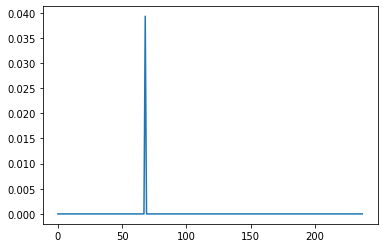

In [16]:
plt.plot(nmf.components_[0])

In [17]:
nmf.reconstruction_err_

0.046417502413141

In [18]:
def renderTopics(words, nmf, features):
  for i, topic_vec in enumerate(nmf.components_):
    print(f"Tópico {i}")
    buff = str()
    for fid in topic_vec.argsort()[-1:-words-1:-1]:
      buff += features[fid] + ' '
    buff += '\n'
    print(buff)

renderTopics(10,nmf, vectorizer_tfidf.get_feature_names())



Tópico 0
event selection advice people goal gibb genetics future frog framework 

Tópico 1
instance problem advice word extraction gibb genetics future frog framework 

Tópico 2
helicopter support word extraction gibb genetics future frog framework frame 

Tópico 3
order search selection knowledge word future frog framework frame form 

Tópico 4
sex identification value advice people frame factor feature fixpoint form 

Tópico 5
halfspace learning extraction goal gibb genetics future frog framework frame 

Tópico 6
planning word extraction gibb genetics future frog framework frame form 

Tópico 7
counting word domain goal gibb genetics future frog framework frame 

Tópico 8
image network word halfspace gibb genetics future frog framework frame 

Tópico 9
identification sex word goal genetics future frog framework frame form 

Tópico 10
result design transportability poisoning word genetics future frog framework frame 

Tópico 11
time value description clustering factor feature fixpoint

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


E com isso teremos todos a lista de tópicos com os principais substantivos.

<div class="alert alert-block alert-info">
5. CASOS DE USO
</div>

Para o segundo exemplo, teremos a seguinte base de dados que consiste em títulos de notícias do jornal ABC.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
documents = pd.read_csv('https://raw.githubusercontent.com/kserranoa/abcNewsDATASET/main/abcnews.csv', error_bad_lines=False)
documents.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


Temos as seguintes colunas:

- publish_date: data de publicação da notícia.
- headline_text: título da publicação da notícia.

Vamos formatar o dataset:

In [20]:
documents = documents.dropna()

Irei redimensionar o dataset por motivos de performance. Infelizmente minha máquina não dá conta de todo o dataset. Então irei usar apenas 400 amostras.

In [21]:
documents = documents.iloc[:DF_SIZE]
documents

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
395,20030220,saff to gauge feelings on planned crown lands ...
396,20030220,safin escude on rotterdam comeback trail
397,20030220,sa govt defends moves to force fine defaulters to
398,20030220,sa govt to appeal against fishing decision


Agora vamos iniciar o processo de modelagem dos tópicos em si. Primeiramente irei instânciar o objeto da classe CountVectorizer, esta por sua vez já explicada acima.

In [22]:
vect = TfidfVectorizer(stop_words='english')

In [23]:
X = vect.fit_transform(documents.headline_text)
X

<400x1334 sparse matrix of type '<class 'numpy.float64'>'
	with 2029 stored elements in Compressed Sparse Row format>

Vamos instânciar e criar o modelo.

In [24]:
model = NMF(n_components=10, random_state=5)

In [25]:
model.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


NMF(n_components=10, random_state=5)

Vamos obter a transformação TF-IDF do modelo.

In [26]:
nmf_features = model.transform(X)

In [27]:
print(X.shape, nmf_features.shape, model.components_.shape)

(400, 1334) (400, 10) (10, 1334)


Vamos criar um dataframe para representar os dados obtidos a partir do modelo.

In [28]:
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100th,11,15,18,250,2500,300,302,314,...,worker,worksafe,world,wouldnt,wound,young,youth,zealand,zimbabwe,zone
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.015623,0.003273,0.000000,0.010686,0.000000,...,0.000000,0.000696,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000370
1,0.007494,0.000000,0.000000,0.000000,0.000000,0.000000,0.033839,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.004248,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.002471,0.000268
2,0.000000,0.000000,0.000413,0.000000,0.000000,0.000000,0.006708,0.000000,0.000000,0.199806,...,0.000000,0.000500,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000121
3,0.000000,0.000000,0.000000,0.050269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.002300,0.000000,0.056652,0.000000,0.000000,0.006307,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003845,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000
5,0.025723,0.000597,0.000000,0.000000,0.000000,0.037297,0.000000,0.000000,0.066482,0.000784,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000675,0.024500,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007264,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000735,0.000000e+00,0.000000,0.00000,0.084067,0.048702,0.000000
7,0.000000,0.000000,0.122795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.020082,0.000000,0.000000,0.001120,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027670,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.784607e-61,0.000000,0.23641,0.000000,0.000000,0.000000
9,0.035389,0.005293,0.000768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000041,0.000000,0.001600,0.000383,0.000000e+00,0.003038,0.00000,0.000000,0.000000,0.004235


In [29]:
renderTopics(10,nmf, vect.get_feature_names())

Tópico 0
anger business 18 blended arrested army arms armed areas arabs 

Tópico 1
attempt boy 18 chemical anti army arms armed areas arabs 

Tópico 2
arrogance canvassing chemical anti army arms armed areas arabs arabians 

Tópico 3
bilby bushwalker business australia chemical armed areas arabs arabians arabia 

Tópico 4
cadell asia changes 18 blended arabians apologises appeal appointed arabia 

Tópico 5
arrests autopsy anti arrested army arms armed areas arabs arabians 

Tópico 6
boosts chemical anti army arms armed areas arabs arabians arabia 

Tópico 7
agreement chemical allocated arrested army arms armed areas arabs arabians 

Tópico 8
ask begin chemical arrests army arms armed areas arabs arabians 

Tópico 9
asia cadell chemical arrested arms armed areas arabs arabians arabia 

Tópico 10
bundaberg alcoholic central boulder chemical arms armed areas arabs arabians 

Tópico 11
celebrates changes alcohol accused apologises appeal appointed arabia arabians arabs 

Tópico 12
business

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


bush chemical announces army arms armed areas arabs arabians arabia 

Tópico 144
arrested buoyant ambitious announces army arms armed areas arabs arabians 

Tópico 145
capriati chemical arrests army arms armed areas arabs arabians arabia 

Tópico 146
ambos calls aboriginal begins changes chemical arabians appeal appointed arabia 

Tópico 147
burger chemical announces army arms armed areas arabs arabians arabia 

Tópico 148
arabia army advertising chemical allocated arrested arms armed areas arabs 

Tópico 149
adelaide chemical allocated arrested army arms armed areas arabs arabians 

Tópico 150
ahead chemical anti arrested army arms armed areas arabs arabians 

Tópico 151
bryant arrests arrested army arms armed areas arabs arabians arabia 

Tópico 152
anti brother announces army arms armed areas arabs arabians arabia 

Tópico 153
blair chemical arriving arrested army arms armed areas arabs arabians 

Tópico 154
break awards announces army arms armed areas arabs arabians arabia 

Tópico

Para este exemplo podemos, a partir da modelagem de tópicos, ter uma breve ideia sobre o assunto da notícia. Vamos apenas demonstrar quais as palavras mais frequentes nas notícias, para isso iremos

In [33]:
documents['headline_text']

0      aba decides against community broadcasting lic...
1         act fire witnesses must be aware of defamation
2         a g calls for infrastructure protection summit
3               air nz staff in aust strike for pay rise
4          air nz strike to affect australian travellers
                             ...                        
395    saff to gauge feelings on planned crown lands ...
396             safin escude on rotterdam comeback trail
397    sa govt defends moves to force fine defaulters to
398           sa govt to appeal against fishing decision
399                  schmeichel set to miss arsenal trip
Name: headline_text, Length: 400, dtype: object

Vamos utilizar a biblioteca WordCloud.

In [34]:
from wordcloud import WordCloud

In [35]:
long_string = ','.join(list(documents['headline_text'].values))

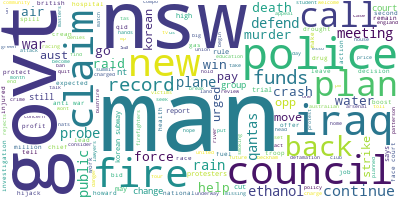

In [38]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=6, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Podemos observar, a partir da imagem acima, as palavras mais utilizadas nos títulos das notícias. Palavras como: homem, police, fire, force, call, claim, são exemplos de palavras que normalmente estão relacionadas com os temas das notícias.

Referências

LDA Topic Modelling with Gensim -  https://predictivehacks.com//da-topic-modelling-with-gensim/

Topic Modeling with NMF and SVD - https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/2.%20Topic%20Modeling%20with%20NMF%20and%20SVD.ipynb

Topic Modeling in Python: Latent Dirichlet Allocation (LDA) - https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0